<h1 style="color: blue"> Assignment1 </h1>
<p>Wonsuk Cha 301155132</p>

# Exercise1

### Prepare 21 character vectors

In [249]:
import numpy as np

font1_a_pre = [[3, 4],[4],[4],[3,5],[3,5],[2,3,4,5,6],[2,6],[2,6],[1,2,3,5,6,7]]
font1_b_pre = [[1,2,3,4,5,6],[2,7],[2,7],[2,7],[2,3,4,5,6],[2,7],[2,7],[2,7],[1,2,3,4,5,6]]
font1_c_pre = [[3,4,5,6,7],[2,7],[1],[1],[1],[1],[1],[2,7],[3,4,5,6]]
font1_d_pre = [[1,2,3,4,5],[2,6],[2,7],[2,7],[2,7],[2,7],[2,7],[2,6],[1,2,3,4,5]]
font1_e_pre = [[1,2,3,4,5,6,7],[2,7],[2],[2,4],[2,3,4],[2,4],[2],[2,7],[1,2,3,4,5,6,7]]
font1_j_pre = [[4,5,6,7],[6],[6],[6],[6],[6],[2,6],[2,6],[3,4,5]]
font1_k_pre = [[1,2,3,6,7],[2,5],[2,4],[2,3],[2,3],[2,4],[2,5],[2,6],[1,2,3,6,7]]

font2_a_pre = [[4],[4],[4],[3,5],[3,5],[2,6],[2,3,4,5,6],[2,6],[2,6]]
font2_b_pre = [[1,2,3,4,5,6],[1,7],[1,7],[1,7],[1,2,3,4,5,6],[1,7],[1,7],[1,7],[1,2,3,4,5,6]]
font2_c_pre = [[3,4,5],[2,6],[1,7],[1],[1],[1],[1,7],[2,6],[3,4,5]]
font2_d_pre = [[1,2,3,4,5],[1,6],[1,7],[1,7],[1,7],[1,7],[1,7],[1,6],[1,2,3,4,5]]
font2_e_pre = [[1,2,3,4,5,6,7],[1],[1],[1],[1,2,3,4,5],[1],[1],[1],[1,2,3,4,5,6,7]]
font2_j_pre = [[6],[6],[6],[6],[6],[6],[2,6],[2,6],[3,4,5]]
font2_k_pre = [[1,6],[1,5],[1,4],[1,3],[1,2],[1,3],[1,4],[1,5],[1,6]]

font3_a_pre = [[4],[4],[3,5],[3,5],[2,6],[2,3,4,5,6],[1,7],[1,7],[1,2,6,7]]
font3_b_pre = [[1,2,3,4,5,6],[2,7],[2,7],[2,3,4,5,6],[2,7],[2,7],[2,7],[2,7],[1,2,3,4,5,6]]
font3_c_pre = [[3,4,5,7],[2,6,7],[1,7],[1],[1],[1],[1,7],[2,6],[3,4,5]]
font3_d_pre = [[1,2,3,4,5],[2,6],[2,7],[2,7],[2,7],[2,7],[2,7],[2,6],[1,2,3,4,5]]
font3_e_pre = [[1,2,3,4,5,6,7],[2,7],[2,5],[2,3,4,5],[2,5],[2],[2],[2,7],[1,2,3,4,5,6,7]]
font3_j_pre = [[5,6,7],[6],[6],[6],[6],[6],[6],[2,6],[3,4,5]]
font3_k_pre = [[1,2,3,6,7],[2,6],[2,5],[2,4],[2,3],[2,4],[2,5],[2,6],[1,2,3,6,7]]

fonts_pre = [font1_a_pre, font1_b_pre, font1_c_pre, font1_d_pre, 
             font1_e_pre, font1_j_pre, font1_k_pre, 
             font2_a_pre, font2_b_pre, font2_c_pre, font2_d_pre, 
             font2_e_pre, font2_j_pre, font2_k_pre,
             font3_a_pre, font3_b_pre, font3_c_pre, font3_d_pre, 
             font3_e_pre, font3_j_pre, font3_k_pre]
y_true = [-1, -1, -1, 1, -1, -1, -1, 
            -1, -1, -1, 1, -1, -1, -1,  
            -1, -1, -1, 1, -1, -1, -1]

def create_character(input):
    output = []
    for idx, line in enumerate(input):
        for i in range(1, 8):
            output.append(1 if i in line else -1)
    return np.array(output)

def create_character_array(list_font_pre):
    list_font = []
    for font_pre in list_font_pre:
        list_font.append(create_character(font_pre))
    return np.array(list_font)

X = create_character_array(fonts_pre)

print('Shape of X: ', X.shape)

Shape of X:  (21, 63)


### Create dataset with noises

In [250]:
import random

def noise_generator(character_array, num_of_noise_pixels):
    char_noise = np.copy(character_array)
    for line in char_noise:
        select_pixels = random.sample(range(line.size), num_of_noise_pixels)
        for index in select_pixels:
            line[index] = 1 if line[index] == -1 else -1
    return char_noise
    
X_noise_5 = noise_generator(X, 5)
X_noise_10 = noise_generator(X, 10)
X_noise_15 = noise_generator(X, 15)
X_noise_20 = noise_generator(X, 20)

print('Differences in noise 5: ', np.where((X[0]-X_noise_5[0]) != 0, 1, 0).sum())
print('Differences in noise 10: ', np.where((X[0]-X_noise_10[0]) != 0, 1, 0).sum())
print('Differences in noise 15: ', np.where((X[0]-X_noise_15[0]) != 0, 1, 0).sum())
print('Differences in noise 20: ', np.where((X[0]-X_noise_20[0]) != 0, 1, 0).sum())

Differences in noise 5:  5
Differences in noise 10:  10
Differences in noise 15:  15
Differences in noise 20:  20


### Display font images and check

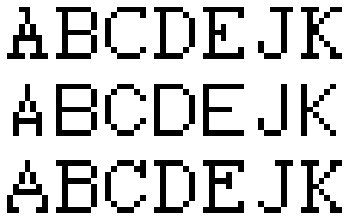

In [251]:
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(3, 7)

def display_font(input, idx):
    font_image = input.reshape(9, 7)
    row = idx // 7
    col = idx % 7
    axes[row, col].imshow(font_image, cmap="binary")
    axes[row, col].axis("off")

for idx, font in enumerate(X):
    display_font(font, idx)

### Create Perceptron class

In [252]:
class Perceptron(object):

    def __init__(self, no_of_inputs, epochs=100, learning_rate=0.01):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + 1)
           
    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        activation = 1 if summation > 0 else -1
        return activation

    def train(self, training_inputs, labels):
        for _ in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)

### Train perceptron instance and predict with font vectors

In [253]:
from sklearn.metrics import accuracy_score

perceptron = Perceptron(63)

perceptron.train(X, y_true)
y_pred_perceptron = [perceptron.predict(X[idx]) for idx in range(X.shape[0])]

accuracy_score(y_pred_perceptron, y_true)

1.0

### Create Adeline Class

In [254]:
class AdalineGD(object):

    def __init__(self, eta=0.01, epochs=100):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)
                

### Create adeline instance, train with fonts and predict

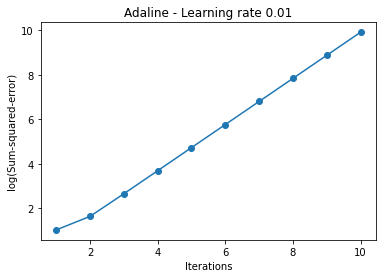

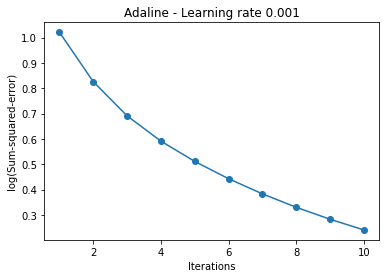

In [255]:
ada = AdalineGD(epochs=10, eta=0.01).train(X, y_true)
plt.plot(range(1, len(ada.cost_)+1), np.log10(ada.cost_), marker='o')
plt.xlabel('Iterations')
plt.ylabel('log(Sum-squared-error)')
plt.title('Adaline - Learning rate 0.01')
plt.show()


ada = AdalineGD(epochs=10, eta=0.001).train(X, y_true)
plt.plot(range(1, len(ada.cost_)+1), np.log10(ada.cost_), marker='o')
plt.xlabel('Iterations')
plt.ylabel('log(Sum-squared-error)')
plt.title('Adaline - Learning rate 0.001')
plt.show()

### Adaline train and predict

In [256]:
ada = AdalineGD(epochs=100, eta=0.001)
ada.train(X, y_true)
y_pred_ada = ada.predict(X)

accuracy_score(y_pred_ada, y_true)

1.0

### Comparison between Perceptron and Adaline with data with noise

In [257]:
# Accuracy with 5 pixels noises
y_pred_perceptron_5 = [perceptron.predict(X_noise_5[idx]) for idx in range(X_noise_5.shape[0])]
y_pred_ada_5 = ada.predict(X_noise_5)
print('Perceptron Accuracy with 5px noises: ', accuracy_score(y_pred_perceptron_5, y_true))
print('Adaline Accuracy with 5px noises:    ', accuracy_score(y_pred_ada_5, y_true), '\n')

# Accuracy with 10 pixels noises
y_pred_perceptron_10 = [perceptron.predict(X_noise_10[idx]) for idx in range(X_noise_10.shape[0])]
y_pred_ada_10 = ada.predict(X_noise_10)
print('Perceptron Accuracy with 10px noises: ', accuracy_score(y_pred_perceptron_10, y_true))
print('Adaline Accuracy with 10px noises:    ', accuracy_score(y_pred_ada_10, y_true), '\n')

# Accuracy with 15 pixels noises
y_pred_perceptron_15 = [perceptron.predict(X_noise_15[idx]) for idx in range(X_noise_15.shape[0])]
y_pred_ada_15 = ada.predict(X_noise_15)
print('Perceptron Accuracy with 15px noises: ', accuracy_score(y_pred_perceptron_15, y_true))
print('Adaline Accuracy with 15px noises:    ', accuracy_score(y_pred_ada_15, y_true), '\n')

# Accuracy with 20 pixels noises
y_pred_perceptron_20 = [perceptron.predict(X_noise_20[idx]) for idx in range(X_noise_20.shape[0])]
y_pred_ada_20 = ada.predict(X_noise_20)
print('Perceptron Accuracy with 20px noises: ', accuracy_score(y_pred_perceptron_20, y_true))
print('Adaline Accuracy with 20px noises:    ', accuracy_score(y_pred_ada_20, y_true), '\n')

Perceptron Accuracy with 5px noises:  1.0
Adaline Accuracy with 5px noises:     1.0 

Perceptron Accuracy with 10px noises:  0.8571428571428571
Adaline Accuracy with 10px noises:     0.9523809523809523 

Perceptron Accuracy with 15px noises:  0.9523809523809523
Adaline Accuracy with 15px noises:     0.9523809523809523 

Perceptron Accuracy with 20px noises:  0.7619047619047619
Adaline Accuracy with 20px noises:     0.8095238095238095 



# Exercise 2

### Define Network Class

In [258]:
import random
import numpy as np

def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

class Network(object):

    def __init__(self, sizes):
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network.  For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs from later layers."""
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The ``training_data`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If ``test_data`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""

        training_data = list(training_data)
        n = len(training_data)

        if test_data:
            test_data = list(test_data)
            n_test = len(test_data)

        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print("Epoch {} : {} / {}".format(j,self.evaluate(test_data),n_test));
            else:
                print("Epoch {} complete".format(j))

    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb
                       for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        # test_results = [(np.argmax(self.feedforward(x)), y)
        #                 for (x, y) in test_data]
        test_results = [(self.feedforward(x), y)
                for (x, y) in test_data]
        # return sum(int(x == y) for (x, y) in test_results)
        return sum(((x - y)**2).sum() for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-y)
    
    def predict(self, X): 
        test_results = [self.feedforward(x) for x in X]
        return [np.rint(arr) for arr in test_results]

### Load dataset

In [259]:
import pandas as pd
import numpy as np

data = pd.read_csv('/Users/wonsukcha/wchaCentennial/OneDrive - Centennial College/3_2021 Fall/COMM258_NN/3_Labs/Week2/hepatitis.data', sep=",", header=None)
data = data.set_axis(['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS',
'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME', 'HISTOLOGY'], axis=1, inplace=False)
X = data.drop('Class', axis=1)
y = pd.DataFrame({
     "Die_Live1": data['Class'] - 1,
     "Die_Live2": np.where(data['Class'] == 2, 0, 1)
     })

print('Features: \n', X, '\n')
print('Targets: \n', y)

Features: 
      AGE  SEX STEROID  ANTIVIRALS FATIGUE MALAISE ANOREXIA LIVER BIG  \
0     30    2       1           2       2       2        2         1   
1     50    1       1           2       1       2        2         1   
2     78    1       2           2       1       2        2         2   
3     31    1       ?           1       2       2        2         2   
4     34    1       2           2       2       2        2         2   
..   ...  ...     ...         ...     ...     ...      ...       ...   
150   46    1       2           2       1       1        1         2   
151   44    1       2           2       1       2        2         2   
152   61    1       1           2       1       1        2         1   
153   53    2       1           2       1       2        2         2   
154   43    1       2           2       1       2        2         2   

    LIVER FIRM SPLEEN PALPABLE SPIDERS ASCITES VARICES BILIRUBIN  \
0            2               2       2       2       2 

### Preprocessing

In [260]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

num_attr = ['AGE', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME']
cat_attr = [column for column in X.columns if column not in num_attr]

num_pipeline = Pipeline([
    ('mean_imputer', SimpleImputer(strategy='mean')),
    ('std_scaler', StandardScaler())
])
cat_pipeline = Pipeline([
    ('freq_imputer', SimpleImputer(strategy="most_frequent"))
])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attr),
    ('cat', cat_pipeline, cat_attr)
])

X = X.replace('?', np.nan)
X_transformed = full_pipeline.fit_transform(X)
X_transformed = X_transformed.astype(np.float)

print(X_transformed)

[[-0.89419175 -0.36093761 -0.43941439 ...  2.          2.
   1.        ]
 [ 0.70257923 -0.44536414  0.64153471 ...  2.          2.
   1.        ]
 [ 2.93805862 -0.61421722 -0.20160559 ...  2.          2.
   1.        ]
 ...
 [ 1.58080328 -0.52979068 -0.65560421 ...  2.          2.
   2.        ]
 [ 0.94209488  0.06119507 -0.52589031 ...  2.          1.
   2.        ]
 [ 0.14370939 -0.19208454 -0.11512966 ...  1.          2.
   2.        ]]


### Data Wrapping

In [261]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size = .20, random_state = 40)

training_inputs = [np.reshape(x, (19, 1)) for x in X_train]
training_results = [np.reshape(y, (2, 1)) for y in np.array(y_train)]
training_data = zip(training_inputs, training_results)

test_inputs = [np.reshape(x, (19, 1)) for x in X_test]
test_results = [np.reshape(y, (2, 1)) for y in np.array(y_test)]
test_data = zip(test_inputs, test_results)

### Train and predict

In [262]:
net = Network([19, 30, 15, 2])
net.SGD(training_data, 100, 100, 3, test_data=test_data)

y_pred = net.predict(test_inputs)

Epoch 0 : 11.07577674606389 / 31
Epoch 1 : 10.58475965957961 / 31
Epoch 2 : 10.405925779763836 / 31
Epoch 3 : 10.227969446820344 / 31
Epoch 4 : 10.036841228305367 / 31
Epoch 5 : 9.800261434967977 / 31
Epoch 6 : 10.036774715825306 / 31
Epoch 7 : 9.549486233835768 / 31
Epoch 8 : 8.901513696475435 / 31
Epoch 9 : 8.779167624626375 / 31
Epoch 10 : 8.77317720509985 / 31
Epoch 11 : 8.763570621306604 / 31
Epoch 12 : 9.186400778682543 / 31
Epoch 13 : 8.448822855822538 / 31
Epoch 14 : 8.589586893322718 / 31
Epoch 15 : 8.127224040380431 / 31
Epoch 16 : 7.983142922640078 / 31
Epoch 17 : 8.074199928922683 / 31
Epoch 18 : 7.845485444841526 / 31
Epoch 19 : 7.814071550405944 / 31
Epoch 20 : 7.674831130607672 / 31
Epoch 21 : 8.168042331820601 / 31
Epoch 22 : 7.768965117013113 / 31
Epoch 23 : 7.315857190574966 / 31
Epoch 24 : 7.307029895174651 / 31
Epoch 25 : 8.725745051962992 / 31
Epoch 26 : 7.051865806369663 / 31
Epoch 27 : 6.985608100275644 / 31
Epoch 28 : 6.916481163675513 / 31
Epoch 29 : 6.73954489

### Measure accuracy

In [263]:
def measure_accuracy(trues, predictions):
    num_correct = 0
    for (true_val, prediction) in zip(trues, predictions):
        if np.array_equal(true_val, prediction):
            num_correct += 1
    return num_correct / len(trues)

print(measure_accuracy(test_results, y_pred))

0.8064516129032258
